In [118]:
import pandas as pd
import numpy as np
import re # neteja strings

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE  # SMOTE per a la sobre-mostració de les classes minoritàries
from imblearn.ensemble import BalancedRandomForestClassifier  # Random Forest balancejat

import warnings

# Suprimir todas las advertencias
warnings.filterwarnings('ignore')

In [119]:
ruta_archivo = r"C:\Users\thais\Documents\00_MACHINE_LEARNING\PROVA TECNICA DATA SCIENCE\LOCALES.csv"
df_0 = pd.read_csv(ruta_archivo, low_memory=False)
df_0.head()

,ID_Global,ID_Bcn_2016,Codi_Principal_Activitat,Nom_Principal_Activitat,Codi_Sector_Activitat,Nom_Sector_Activitat,Codi_Grup_Activitat,Nom_Grup_Activitat,Codi_Activitat_2022,Nom_Activitat,...,Solar,Codi_Parcela,Codi_Illa,Seccio_Censal,Codi_Barri,Nom_Barri,Codi_Districte,Nom_Districte,Referencia_Cadastral,Data_Revisio
0,2577e29a-b8d7-41f9-b751-49507d679c94,53938.0,1,Actiu,2,Serveis,16,Altres,1600102,Activitats emmagatzematge,...,574888.0,32.0,92670.0,47,60,Sant Andreu,9,Sant Andreu,2272432DF3827C,2021-06-22
1,a2463c00-b817-408f-ad31-cf32c08ca00a,53941.0,1,Actiu,2,Serveis,9,Ensenyament,9000000,Ensenyament,...,159607.0,22.0,92670.0,47,60,Sant Andreu,9,Sant Andreu,2272422DF3827C,2021-06-22
2,47706876-da40-4fc8-b1dd-03730ca86205,53918.0,1,Actiu,2,Serveis,16,Altres,1600400,Serveis a les empreses i oficines,...,307364.0,8.0,92663.0,47,60,Sant Andreu,9,Sant Andreu,2272908DF3827A,2021-06-22
3,82c0708f-577b-4304-a7f2-6e3982a8935e,53964.0,1,Actiu,2,Serveis,9,Ensenyament,9000000,Ensenyament,...,142660.0,22.0,92740.0,47,60,Sant Andreu,9,Sant Andreu,2173822DF3827C,2021-06-22
4,a3bd8a79-b4e8-4989-ad4b-ac6296701fec,53967.0,1,Actiu,2,Serveis,16,Altres,1600400,Serveis a les empreses i oficines,...,142661.0,23.0,92740.0,47,60,Sant Andreu,9,Sant Andreu,2173823DF3827C,2021-06-22


In [120]:
for col in df_0.columns:
    print(col)

ID_Global
ID_Bcn_2016
Codi_Principal_Activitat
Nom_Principal_Activitat
Codi_Sector_Activitat
Nom_Sector_Activitat
Codi_Grup_Activitat
Nom_Grup_Activitat
Codi_Activitat_2022
Nom_Activitat
Codi_Activitat_2016
Nom_Local
SN_Oci_Nocturn
SN_Coworking
SN_Servei_Degustacio
SN_Obert24h
SN_Mixtura
SN_Carrer
SN_Mercat
Nom_Mercat
SN_Galeria
Nom_Galeria
SN_CComercial
Nom_CComercial
SN_Eix
Nom_Eix
X_UTM_ETRS89
Y_UTM_ETRS89
Latitud
Longitud
Direccio_Unica
Codi_Via
Nom_Via
Planta
Porta
Num_Policia_Inicial
Lletra_Inicial
Num_Policia_Final
Lletra_Final
Solar
Codi_Parcela
Codi_Illa
Seccio_Censal
Codi_Barri
Nom_Barri
Codi_Districte
Nom_Districte
Referencia_Cadastral
Data_Revisio


In [121]:
df_0.describe()

,ID_Bcn_2016,Codi_Principal_Activitat,Codi_Sector_Activitat,Codi_Grup_Activitat,Codi_Activitat_2022,X_UTM_ETRS89,Y_UTM_ETRS89,Latitud,Longitud,Codi_Via,Porta,Num_Policia_Inicial,Num_Policia_Final,Solar,Codi_Parcela,Codi_Illa,Seccio_Censal,Codi_Barri,Codi_Districte
count,58019.000000,66088.000000,66088.000000,66088.000000,6.608800e+04,66088.000000,6.608800e+04,66088.000000,66088.000000,66088.000000,63045.000000,66087.000000,66080.000000,65984.000000,65995.000000,65995.000000,66088.000000,66088.000000,66088.000000
mean,41604.459281,0.891357,1.859127,9.314565,2.088482e+06,430216.161921,4.583622e+06,41.401108,2.165168,198961.478650,22.315425,111.508950,112.500953,248327.657659,11.714933,47695.592242,59.814974,28.587051,5.036784
std,21743.719055,0.311193,0.691582,6.531307,2.000116e+06,1813.057666,2.227813e+03,0.020138,0.021571,130999.057107,28.925042,152.019128,149.627018,181510.596868,12.269607,30979.495278,40.244692,22.348009,3.066499
min,4215.000000,0.000000,1.000000,0.000000,1.000000e+01,423799.475627,4.577403e+06,41.344821,2.088023,306.000000,3.000000,0.000000,0.000000,792.000000,1.000000,5010.000000,1.000000,1.000000,1.000000
25%,22656.500000,1.000000,1.000000,2.000000,1.100000e+06,428867.120040,4.581804e+06,41.384713,2.149168,94118.500000,10.000000,17.000000,18.000000,120438.750000,3.000000,20990.000000,28.000000,8.000000,2.000000
50%,41710.000000,1.000000,2.000000,12.000000,1.600102e+06,430271.649691,4.583432e+06,41.399378,2.165895,187207.000000,10.000000,53.000000,54.000000,147243.000000,9.000000,40470.000000,53.000000,25.000000,5.000000
75%,61466.500000,1.000000,2.000000,16.000000,1.700600e+06,431467.576602,4.584965e+06,41.413293,2.180025,288626.500000,20.000000,153.000000,155.000000,306026.000000,16.000000,80570.000000,83.000000,45.000000,8.000000
max,78056.000000,1.000000,3.000000,17.000000,9.000000e+06,434876.705365,4.590873e+06,41.466530,2.220789,701801.000000,900.000000,9999.000000,9999.000000,583998.000000,302.000000,99535.000000,237.000000,73.000000,10.000000


_No té sentit els valors estadístics de la descripció quan bàsicament ens estem referint a codis relacionats amb les categories_

In [122]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66088 entries, 0 to 66087
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_Global                 66088 non-null  object 
 1   ID_Bcn_2016               58019 non-null  float64
 2   Codi_Principal_Activitat  66088 non-null  int64  
 3   Nom_Principal_Activitat   66088 non-null  object 
 4   Codi_Sector_Activitat     66088 non-null  int64  
 5   Nom_Sector_Activitat      66088 non-null  object 
 6   Codi_Grup_Activitat       66088 non-null  int64  
 7   Nom_Grup_Activitat        66088 non-null  object 
 8   Codi_Activitat_2022       66088 non-null  int64  
 9   Nom_Activitat             66088 non-null  object 
 10  Codi_Activitat_2016       66088 non-null  object 
 11  Nom_Local                 66088 non-null  object 
 12  SN_Oci_Nocturn            66088 non-null  object 
 13  SN_Coworking              66088 non-null  object 
 14  SN_Ser

_Bàsicament observem un df amb categories i còdis, per un estudi que permetrà una classificació supervisada però no regressions numèriques_

# 1. Anàlisi Descriptiva Inicial #

### 1. Estructura del DataFrame ###
El conjunt de dades consta de 66.088 registres amb 49 columnes. De les columnes disponibles, algunes contenen dades numèriques (bàsicament codis), altres són de tipus objecte (cadenes de text) i també hi ha columnes amb valors nuls.   
Cada registre és únic i conté característiques sobretot d'ubicació i d'activitat comercial.

### 2. Descripció general de les columnes ###
A continuació, es proporciona una descripció general de les columnes clau i les seves característiques:
ID_Global: Identificador únic per cada registre.   
ID_Bcn_2016: Identificador de l'activitat a la ciutat de Barcelona (algunes files tenen valors nuls).   
Codi_Principal_Activitat, Codi_Sector_Activitat, Codi_Grup_Activitat, Codi_Activitat_2022: Còdigs que identifiquen la categoria i subcategoria de l'activitat econòmica del local. Aquests valors són numèrics i els agruparem per analitzar l'activitat comercial.  
Nom_Principal_Activitat, Nom_Sector_Activitat, Nom_Grup_Activitat, Nom_Activitat: Noms que descriuen les activitats comercials i el seu sector. Són columnes de tipus objecte (cadenes de text).  

Coordenades geogràfiques (Latitud, Longitud): Permeten la geolocalització dels establiments.    
Ubicació (Codi_Via, Nom_Via, Codi_Barri, Nom_Barri, Codi_Districte, Nom_Districte): Dades sobre la localització i districte del local.
Altres dades de localització i estructurals (Planta, Porta, Num_Policia_Inicial, Num_Policia_Final): Dades relacionades amb la localització específica del local dins de l'edifici i la seva identificació legal.  

Tipus d'establiment (p. ex., SN_Oci_Nocturn, SN_Coworking, SN_Servei_Degustacio): Dades categòriques per identificar si un local té característiques especials (oci nocturn, coworking, etc.).   

### 3. Estadístiques Descriptives Generals ###  
Les següents estadístiques es basen en les columnes numèriques de les dades:  
ID_Bcn_2016: Els valors de l'ID_Bcn_2016 varien entre 4215 i 78056, però no els utilitzarem degut al gran nombre de valors faltants i ja tenim un altra ID únic.  

Coordenades UTM (X_UTM_ETRS89, Y_UTM_ETRS89), Latitud i Longitud: Les coordenades UTM tenen valors molt específics que ajuden a identificar les ubicacions a la ciutat de Barcelona.

Codi_Via i Porta: Aquestes columnes ofereixen la informació sobre les vies i les portes dels locals. Tanmateix, la columna de "Porta" té alguns valors nuls, que gestionarem posteriorment.

Solar, Codi_Parcela, Codi_Illa: Són codis utilitzats per identificar el solar i la parcel·la associada a cada local. 
Num_Policia_Inicial, Num_Policia_Final: Aquestes columnes mostren els rangs d'adreça per número de policia. ens poden orientar millor que el num porta.

### 4. Manca de Dades i valors nuls ### 
Algunes columnes contenen valors nuls en una proporció significativa de les files:   

Nom_Mercat: Aquesta columna conté només 2.154 valors no nuls, mentre que la resta estan nuls. Això pot indicar que només una part dels establiments estan en mercats.   
Nom_Galeria i Nom_CComercial: Similarment, aquestes columnes tenen valors nuls en moltes files, però no necessitem aquestes variables per l'estudi.   
Porta, Num_Policia_Inicial, Num_Policia_Final: Algunes d'aquestes dades tenen valors nuls, manca d'una identificació precisa en determinades ubicacions.

El conjunt de dades conté algunes columnes amb una proporció relativament alta de valors nuls. És important netejar o imputar aquests valors abans de continuar amb l'anàlisi. Les columnes s'han de revisar.

### 5. Tipus de Dades ###
Dades numèriques: Aquests inclouen les coordenades UTM, latitud, longitud, així com algunes altres dades d’identificació com el Codi_Via.   
Dades de text: Els noms de les activitats, sectors, grups d'activitat i altres elements descriptius.   
Dades booleanes: Dades com SN_Oci_Nocturn, SN_Coworking, SN_Servei_Degustacio indiquen la presència o absència de característiques específiques dels locals. 

In [123]:
(df_0.isna().sum().sum(), df_0.isnull().sum().sum(), df_0.loc[df_0.duplicated()].sum().sum())
nulos_por_columna = df_0.isnull().sum()
print(nulos_por_columna[nulos_por_columna > 0])

ID_Bcn_2016              8069
Nom_Mercat              63934
Nom_Galeria             65774
Nom_CComercial          65245
Nom_Eix                 45406
Porta                    3043
Num_Policia_Inicial         1
Lletra_Inicial          64026
Num_Policia_Final           8
Lletra_Final            64126
Solar                     104
Codi_Parcela               93
Codi_Illa                  93
Referencia_Cadastral       93
dtype: int64


# 2. Neteja inicial del DataFrame #

En el procés de neteja, podem considerar prescindir de les columnes amb una quantitat elevada de valors nuls sempre i quant no siguin rellevants per l'anàlisi: 

### Columnes amb gairebé tots els valors nuls: ### 

Nom_Galeria: Té 65,774 valors nuls de 66,088 files. No necessitem aquesta informació per l'estudi.  
Nom_CComercial: Té 65,245 valors nuls. No necessitem aquesta informació per l'estudi.  
Lletra_Inicial i Lletra_Final: Aquestes dues columnes tenen més de 64,000 valors nuls cadascuna. No necessitem aquesta precisió en l’adreça de l’establiment.  
### Columnes amb presència limitada de dades específiques: ###

Nom_Mercat: Amb 63,934 valors nuls, no és necessari tenir el nom específic dels mercats per als establiments, doncs l'estudi serà més global per barris i districtes.     
Nom_Eix: Aquesta columna dóna informació adicional però tenin la posició geogràfica i tenint tants valors nuls, millor excloure-la, ja que té 45,406 valors nuls.  

### Columnes amb valors geoespacials duplicats o opcionalment prescindibles: ###

Porta: No és necessari per a l’anàlisi de la ubicació exacta de cada establiment.
Solar, Codi_Parcela, Codi_Illa, Referencia_Cadastral: Aquestes són molt específiques per identificar. Si ens hagués fallat l'ID únic, haguéssim hagut potser d'utilitzar-les, doncs per exempla la referència cadastrals és única. Però com no és el cas, l'eliminarem.  

### Columnes amb gairebé cap valor nul però que podrien no ser crítiques segons l’anàlisi: ###

ID_Bcn_2016: Tot i que és un identificador, l'exclourem, ja es té ID_Global com a identificador únic.
Num_Policia_Inicial i Num_Policia_Final: Són útils per a la identificació exacta de la direcció, però no necessitem tanta precisió. 

_DE TOTES MANERES, VULL MANTENIR EL DF_NET, SENSE NULS I DESPRÉS JA PROCEDIRÉ A ELIMINAR COLUMNES PER SI POSTERIORMENT A LES MÈTRIQUES OBTINGUDES A L'ESTUDI (SUPOSEM CASOS DE MULTICOLINEALITAT O ALTRES), RECONSIDERÉS INCLOURE-LES._  

In [124]:
df_net=df_0.copy()

In [125]:
# De moment, així com ID bcn seria un focus de multicolinealitat, la eliminarem, igual que porta, els codis i solar tampoc i lareferencia cadastral tampoc la considerarem guardar. Donat que la majoria de Nuls es situen en quan s'ha dividit la variable Nom, entenc que no aplica, doncs si està en un mercat, no està en una galeria o eix comercial.
nom_columns = [
    'Nom_Mercat', 'Nom_Galeria', 'Nom_CComercial', 'Nom_Eix', 
    'Solar', 'Codi_Parcela','Codi_Illa'
]
df_net[nom_columns] = df_net[nom_columns].fillna('No aplica')

In [126]:
# Omplim valors nuls 'Num_Policia_Inicial' amb valors de 'Num_Policia_Final'
df_net['Num_Policia_Inicial'] = df_net['Num_Policia_Inicial'].fillna(df_net['Num_Policia_Final'])

# Omplim valors nuls'Num_Policia_Final' amb valores de 'Num_Policia_Inicial'
df_net['Num_Policia_Final'] = df_net['Num_Policia_Final'].fillna(df_net['Num_Policia_Inicial'])

In [127]:
# Identificar les files on qualsevol de les dues columnes és nul·la
files_nuls_any = df_net[df_net['Num_Policia_Inicial'].isnull() | df_net['Num_Policia_Final'].isnull()]
files_nuls_any

,ID_Global,ID_Bcn_2016,Codi_Principal_Activitat,Nom_Principal_Activitat,Codi_Sector_Activitat,Nom_Sector_Activitat,Codi_Grup_Activitat,Nom_Grup_Activitat,Codi_Activitat_2022,Nom_Activitat,...,Solar,Codi_Parcela,Codi_Illa,Seccio_Censal,Codi_Barri,Nom_Barri,Codi_Districte,Nom_Districte,Referencia_Cadastral,Data_Revisio
19922,330d4e41-029a-4673-95b9-56e016e4a3f5,30886.0,1,Actiu,2,Serveis,16,Altres,1600600,Perruqueries,...,82745.0,18.0,82510.0,63,31,la Vila de Gràcia,6,Gràcia,0142218DF3804A,2021-03-05


In [128]:
# Eliminem les dos columnes que tenen valors nuls però que estem segurs que no necessitar
df_net = df_net.drop(columns=['Referencia_Cadastral','ID_Bcn_2016','Lletra_Inicial', 'Lletra_Final','Porta'])

In [129]:
df_net.loc[19922, 'Num_Policia_Inicial'] = 10
df_net.loc[19922, 'Num_Policia_Final'] = 10

In [130]:
# Comprovar si hi ha valors nuls a tot el DataFrame
missing_values = df_net.isnull().sum()
# Comprovar si hi ha valors nuls en tot el DataFrame (sumant tots els nuls)
if missing_values.sum() == 0:
    print("No hi ha valors nuls a tot el DataFrame.")
else:
    print("Hi ha valors nuls a alguna columna.")


No hi ha valors nuls a tot el DataFrame.


In [131]:
# Comprovar si hi ha duplicats al DataFrame
duplicates = df_net.duplicated().sum()
print(f"Nombre de duplicats: {duplicates}")
# Si vols eliminar els duplicats, pots fer-ho així:
df_net = df_net.drop_duplicates()

Nombre de duplicats: 0


In [132]:
df_net['Planta'].unique()

array(['LOC'], dtype=object)

In [133]:
df_net = df_net.drop(columns=['Planta'])

In [134]:
# Guardar el DataFrame df_net com a fitxer CSV
df_net.to_csv('df_net_guardat.csv', index=False) 

In [135]:
# Iterar per cada columna del DataFrame i mostrar els valors únics
for column in df_net.columns:
    print(f"Valors únics de la columna {column}:")
    print(df_net[column].unique())
    print("-" * 50)  # Separador per llegir millor els resultats


Valors únics de la columna ID_Global:
['2577e29a-b8d7-41f9-b751-49507d679c94'
 'a2463c00-b817-408f-ad31-cf32c08ca00a'
 '47706876-da40-4fc8-b1dd-03730ca86205' ...
 'd573ced5-9d22-4125-8654-5cfd79907996'
 '968cb78f-d18f-47ff-abc7-9d253a19006b'
 '2ca07294-ab0a-42fe-b188-ca9a49e26d08']
--------------------------------------------------
Valors únics de la columna Codi_Principal_Activitat:
[1 0]
--------------------------------------------------
Valors únics de la columna Nom_Principal_Activitat:
['Actiu' 'Sense activitat Econòmica']
--------------------------------------------------
Valors únics de la columna Codi_Sector_Activitat:
[2 3 1]
--------------------------------------------------
Valors únics de la columna Nom_Sector_Activitat:
['Serveis' 'Altres' 'Comerç al detall' 'Locals buits en venda i lloguer'
 'Locals buits en venda' 'Locals buits en lloguer'
 'Comerç al detall /Engròs']
--------------------------------------------------
Valors únics de la columna Codi_Grup_Activitat:
[16  

### Conversions de formats ###

In [136]:
df_net['Data_Revisio'] = pd.to_datetime(df_net['Data_Revisio'], errors='coerce')

In [137]:
# Mostra les columnes que són de tipus object
cols_object = df_net.select_dtypes(include='object').columns.tolist()

# Imprimir les columnes de tipus object per revisar
print("Columns of type 'object':", cols_object)

Columns of type 'object': ['ID_Global', 'Nom_Principal_Activitat', 'Nom_Sector_Activitat', 'Nom_Grup_Activitat', 'Nom_Activitat', 'Codi_Activitat_2016', 'Nom_Local', 'SN_Oci_Nocturn', 'SN_Coworking', 'SN_Servei_Degustacio', 'SN_Obert24h', 'SN_Mixtura', 'SN_Carrer', 'SN_Mercat', 'Nom_Mercat', 'SN_Galeria', 'Nom_Galeria', 'SN_CComercial', 'Nom_CComercial', 'SN_Eix', 'Nom_Eix', 'Direccio_Unica', 'Nom_Via', 'Solar', 'Codi_Parcela', 'Codi_Illa', 'Nom_Barri', 'Nom_Districte']


In [138]:
# Llista amb Strings a netejar
cols_to_clean = [
    'Nom_Principal_Activitat', 'Nom_Sector_Activitat', 'Nom_Grup_Activitat', 
    'Nom_Activitat', 'Nom_Local', 'Nom_Mercat', 'Nom_Galeria', 
    'Nom_CComercial', 'Nom_Eix', 'Direccio_Unica', 'Nom_Via', 
    'Nom_Barri', 'Nom_Districte'
]

# Neteja de caràcters especials i errors tipogràfics a les columnes especificades
for col in cols_to_clean:
    if col in df_net.columns:
        print(f"\nProcessing column: {col}")
        
        # 1. Eliminar caràcters especials (només permet lletres, números i espais)
        df_net[col] = df_net[col].apply(lambda x: re.sub(r'[^a-zA-Zà-ÿç0-9\s]', '', str(x)))  # Permet lletres amb accents, "ç" i números
        
        # 2. Convertir els noms a minúscules per tenir consistència
        df_net[col] = df_net[col].apply(lambda x: x.strip().lower())  # Elimina espais extra i passa a minúscules
        
        # 3. Eliminar espais extra en les cadenes
        df_net[col] = df_net[col].apply(lambda x: re.sub(r'\s+', ' ', x))  # Substitueix múltiples espais per un sol espai



Processing column: Nom_Principal_Activitat

Processing column: Nom_Sector_Activitat

Processing column: Nom_Grup_Activitat

Processing column: Nom_Activitat

Processing column: Nom_Local

Processing column: Nom_Mercat

Processing column: Nom_Galeria

Processing column: Nom_CComercial

Processing column: Nom_Eix

Processing column: Direccio_Unica

Processing column: Nom_Via

Processing column: Nom_Barri

Processing column: Nom_Districte


In [139]:
cols_to_drop = ['Codi_Activitat_2016', 'Solar', 'Codi_Parcela', 'Codi_Illa']
df_net_cleaned = df_net.drop(columns=cols_to_drop)

In [140]:
# convertir a int esl 0/1 de les variables que ara mateix són objecte 
cols_01 = ['SN_Oci_Nocturn', 'SN_Coworking', 'SN_Servei_Degustacio', 'SN_Obert24h', 'SN_Mixtura',
        'SN_Carrer', 'SN_Mercat', 'SN_Galeria', 'SN_CComercial', 'SN_Eix']
for col in cols_01:
    df_net[col] = df_net[col].map({'Sí': 1, 'No': 0})  # Substituir 'Sí' per 1 i 'No' per 0

In [141]:
df_net['Data_Revisio'] = pd.to_datetime(df_net['Data_Revisio'])
df_net['Data_Revisio'] = df_net['Data_Revisio'] .dt.strftime('%d-%m-%Y') # donem format a la data

In [142]:
# Revisar les columnes booleanes per revisar que estiguin correctes
df_net[['SN_Oci_Nocturn', 'SN_Coworking', 'SN_Servei_Degustacio','SN_Obert24h','SN_Mixtura','SN_Carrer','SN_Mercat','SN_Galeria','SN_CComercial','SN_Eix']].apply(lambda x: x.unique())

,SN_Oci_Nocturn,SN_Coworking,SN_Servei_Degustacio,SN_Obert24h,SN_Mixtura,SN_Carrer,SN_Mercat,SN_Galeria,SN_CComercial,SN_Eix
0,0,0,0,0,0,1,0,0,0,0
1,1,1,1,1,1,0,1,1,1,1


In [143]:
# Revisar les coordenades UTM per comprobar que no hi ha dades incoherents
df_net[['X_UTM_ETRS89', 'Y_UTM_ETRS89']].describe()

,X_UTM_ETRS89,Y_UTM_ETRS89
count,66088.000000,6.608800e+04
mean,430216.161921,4.583622e+06
std,1813.057666,2.227813e+03
min,423799.475627,4.577403e+06
25%,428867.120040,4.581804e+06
50%,430271.649691,4.583432e+06
75%,431467.576602,4.584965e+06
max,434876.705365,4.590873e+06


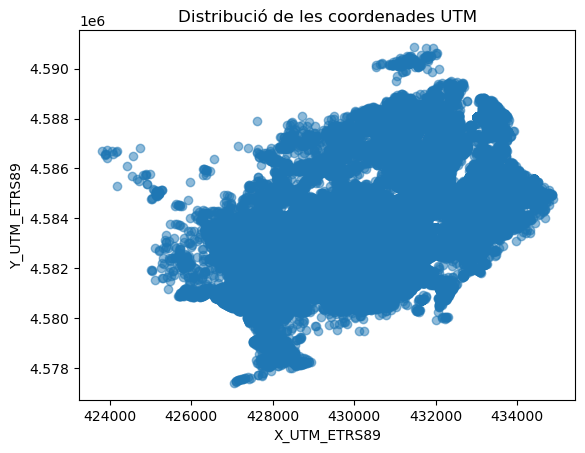

In [144]:
# visualització de les coordenades
plt.scatter(df_net['X_UTM_ETRS89'], df_net['Y_UTM_ETRS89'], alpha=0.5)
plt.title("Distribució de les coordenades UTM")
plt.xlabel("X_UTM_ETRS89")
plt.ylabel("Y_UTM_ETRS89")
plt.show()

In [145]:
# !pip install pyproj # descarto per ocupar massa memòria i processador. s'em bloqueja el projecte cada vegada.

### Visualització de les correlacions numèriques ###    
tot i saber que en aquest dataframe prevaleixen les categòriques, doncs les numèriques només són referències d'ubicació o d'activitat:

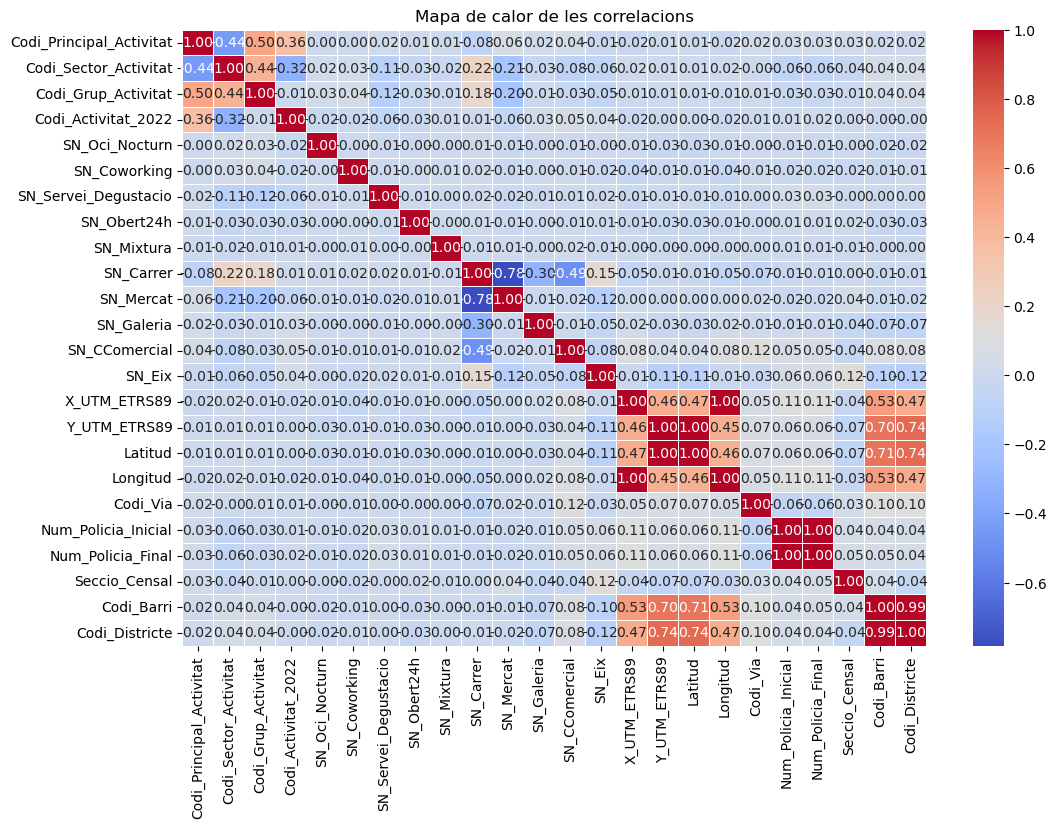

In [146]:
# Seleccionar només les columnes numèriques
df_net_numeric = df_net.select_dtypes(include=[float, int])

# Calcular la correlació entre les columnes numèriques
corr = df_net_numeric.corr()

# Crear un mapa de calor de les correlacions
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de calor de les correlacions')
plt.show()

_Només veiem correlacions llògiques com codi barri amb codi districte, o num inici i fi del carrer, i les de ubicació (codi UTM i Latitud/Longitud). I en sentit negatiu, doncs el normal: si un local està al carrer, no està al mercat ni a un cc comercial... Així que no tenim cap informació rellevant._

In [147]:
# acabem d'eliminar columes que aporten la mateixa informació com Latitud i longitud i utm, 

cols_to_drop2 = ['X_UTM_ETRS89', 'Y_UTM_ETRS89', ]
df_net_cleaned = df_net.drop(columns=cols_to_drop2)

# 3. Primeres Visualitzacions EDA #

## 3.1. Distribució d'Establiments per Sector i Grup d'Activitat ##

In [148]:
df_EDA =df_net.copy() # creo un df per si el necessito posteriorment sense els canvis aplicats d'agrupament

In [149]:
# Agrupar els valors que continguin "Locals buits" en una nova categoria "Locals buits"
df_net['Nom_Sector_Activitat'] = df_net['Nom_Sector_Activitat'].apply(
    lambda x: 'Locals buits' if 'locals buits' in str(x).lower() else x
)

df_net['Nom_Sector_Activitat'] = df_net['Nom_Sector_Activitat'].replace({
    'comerç al detall': 'Comerç al detall',
    'comerç al detall engròs': 'Comerç al detall'
})

In [150]:
df_net['Nom_Sector_Activitat'].unique()
#Altres inclou: Activitats de la construcció, Activitats industrials, Associacions, Arts gràfiques, Equipaments religiosos, Equipaments esportius/Gimnàs/fitnes, Administració, Fabricació tèxtil

array(['serveis', 'altres', 'Comerç al detall', 'Locals buits'],
      dtype=object)

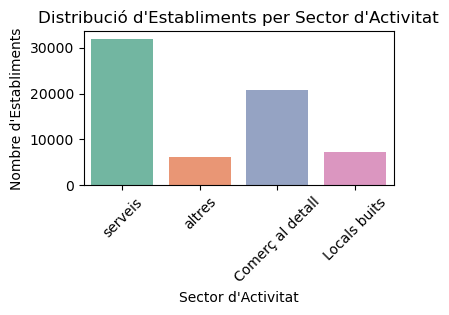

In [151]:
# Gràfica de barres per Nom_Sector_Activitat
plt.figure(figsize=(4,2))
sns.countplot(x='Nom_Sector_Activitat', data=df_net, palette='Set2')
plt.title('Distribució d\'Establiments per Sector d\'Activitat')
plt.xlabel('Sector d\'Activitat')
plt.ylabel('Nombre d\'Establiments')
plt.xticks(rotation=45)
plt.show()

_Aquests gràfics de barres mostren com el sector de serveis és el que compta amb més número d'establiments, precedit pel comerç al detall. En el segon gràfic, observem a quin sector pertanyen les activitats i amb quina quantitat d'establiments._

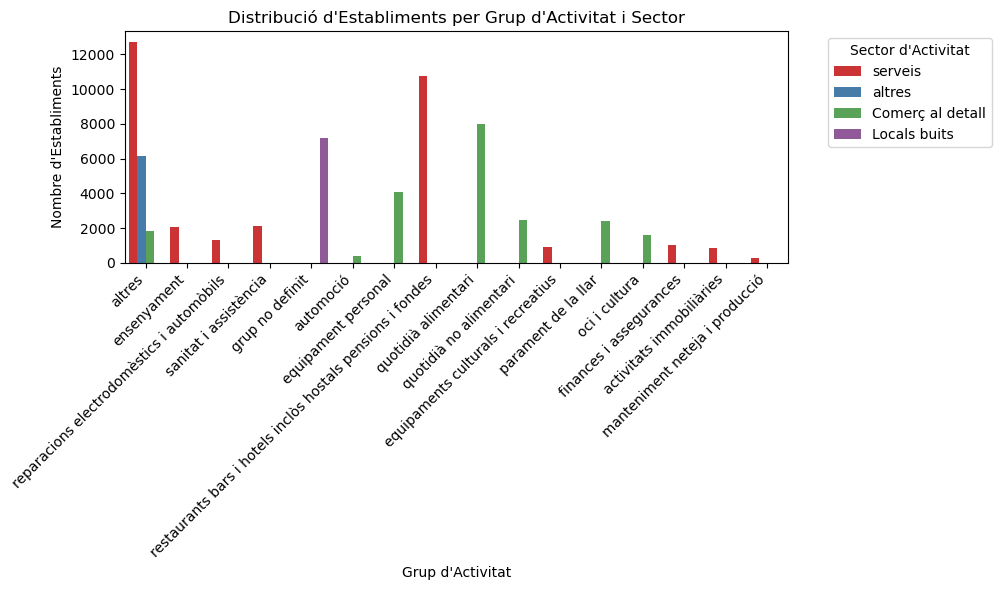

In [152]:
# Gràfica de barres per Nom_Activitat dins de cada sector
plt.figure(figsize=(10,6))
sns.countplot(x='Nom_Grup_Activitat', hue='Nom_Sector_Activitat', data=df_net, palette='Set1')
plt.title('Distribució d\'Establiments per Grup d\'Activitat i Sector')
plt.xlabel('Grup d\'Activitat')
plt.ylabel('Nombre d\'Establiments')


# Ajustar les etiquetes de la barra X per evitar el solapament
plt.xticks(rotation=45, ha='right')  # Rotar les etiquetes a 45 graus i ajustar l'alineació horitzontal
plt.legend(title='Sector d\'Activitat', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Ajustar el layout per evitar que es tallin les etiquetes
plt.show()

_Restaurants i quotidià alimentari encapçalen el major nombre d'establiments, tot i que l'agrupació en altres serveis és més alta. Donant poc pas al grup d'activitats com automoció o manteniment de neteja i producció._

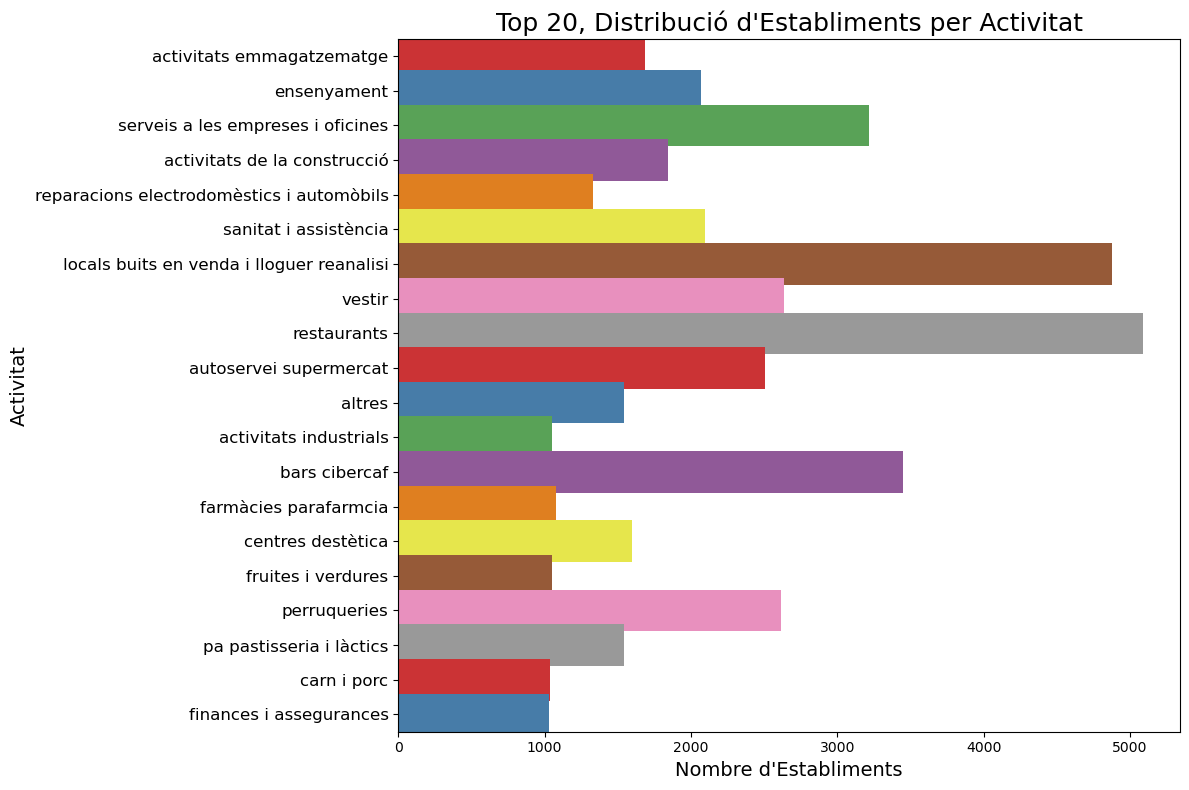

In [212]:
# Excloure 'Locals buits' de les activitats
df_net_filtered = df_net[df_net['Nom_Activitat'] != 'locals buits en venda i lloguer reanalisi']
df_net_filtered = df_net[df_net['Nom_Activitat'] != 'locals buits en lloguer']

# Seleccionar les 20 activitats més comunes (després d'excloure 'Locals buits')
top_activities = df_net_filtered['Nom_Activitat'].value_counts().nlargest(20).index

# Filtrar el DataFrame per incloure només les activitats més comunes
df_top_activities = df_net_filtered[df_net_filtered['Nom_Activitat'].isin(top_activities)]

# Gràfica de barres
plt.figure(figsize=(12, 8))  # Augmentar la figura per a una millor visualització
sns.countplot(y='Nom_Activitat', data=df_top_activities, palette='Set1', width=1.2)  # Amplia les barres

# Títol i etiquetes
plt.title('Top 20, Distribució d\'Establiments per Activitat', fontsize=18)
plt.ylabel('Activitat', fontsize=14)
plt.xlabel('Nombre d\'Establiments', fontsize=14)

# Ajustar les etiquetes de l'eix Y per evitar el solapament
plt.yticks(rotation=0, ha='right', fontsize=12)  # Les etiquetes de l'eix Y horitzontals

# Ajustar el layout per evitar que es tallin les etiquetes
plt.tight_layout()

# Mostrar la gràfica
plt.show()


_Aquests gràfics de barres mostren les top 20 activitats concretes. Restaurants i bars cibercafè són les activitats que més predominen. La resta segueixen amb grups bastant proporcionats_


## 3.2. Distribució Geogràfica d'Establiments Actius per Districte i Barri ##

### Gràfica de barres per districte i barri: ###

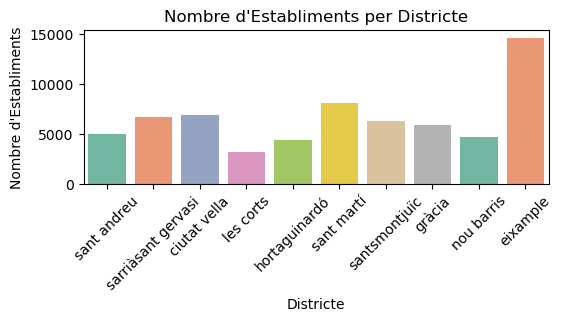

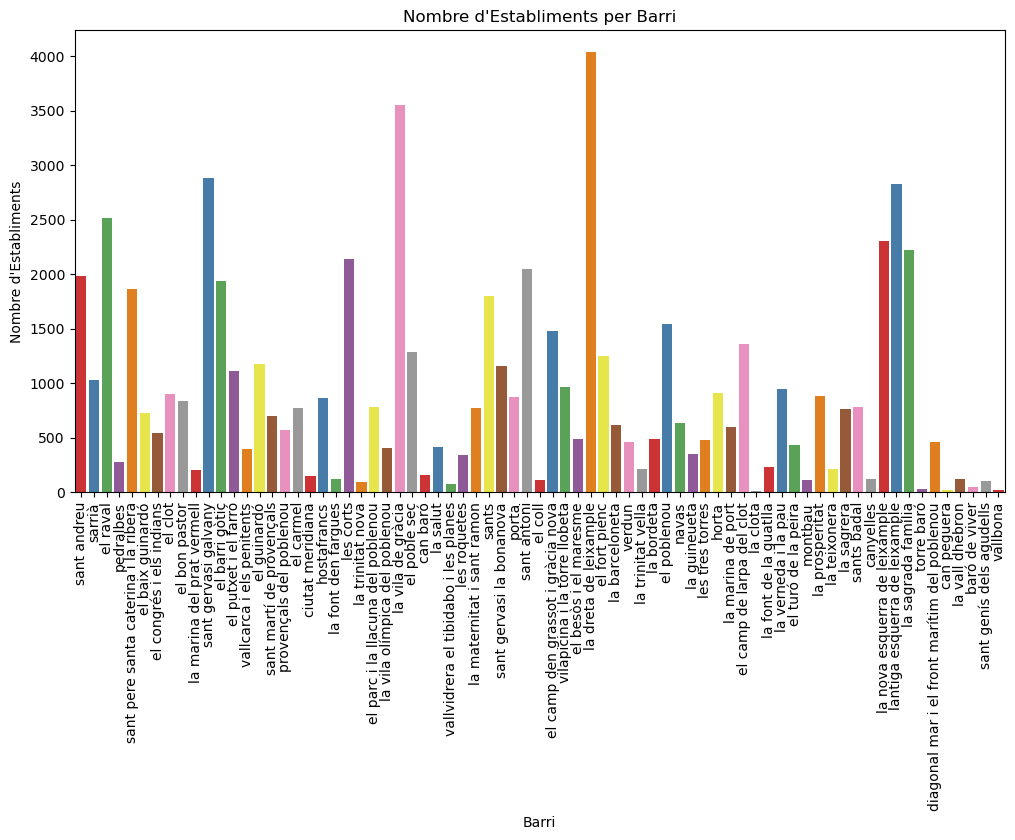

In [180]:
# Gràfica de barres per Nom_Districte
plt.figure(figsize=(6, 2))
sns.countplot(x='Nom_Districte', data=df_net, palette='Set2')
plt.title('Nombre d\'Establiments per Districte')
plt.xlabel('Districte')
plt.ylabel('Nombre d\'Establiments')
plt.xticks(rotation=45)
plt.show()

# Gràfica de barres per Nom_Barri
plt.figure(figsize=(12, 6))
sns.countplot(x='Nom_Barri', data=df_net, palette='Set1')
plt.title('Nombre d\'Establiments per Barri')
plt.xlabel('Barri')
plt.ylabel('Nombre d\'Establiments')
plt.xticks(rotation=90)
plt.show()


_El districte on es concentren la majoria d'establiments és L'Eixample, que es mostra dividit en diferents barris: dreta i dos esquerres, seguint per Sagrada Familia, Gràcia, les Corts, Sant Gervasi i barri Gòtic._

## 3.3. Comparativa de Tipus d'Establiments (Oci, Coworking, Degustació, etc.) ##
Per mostrar quins serveis estan presents en cada grup o districte.


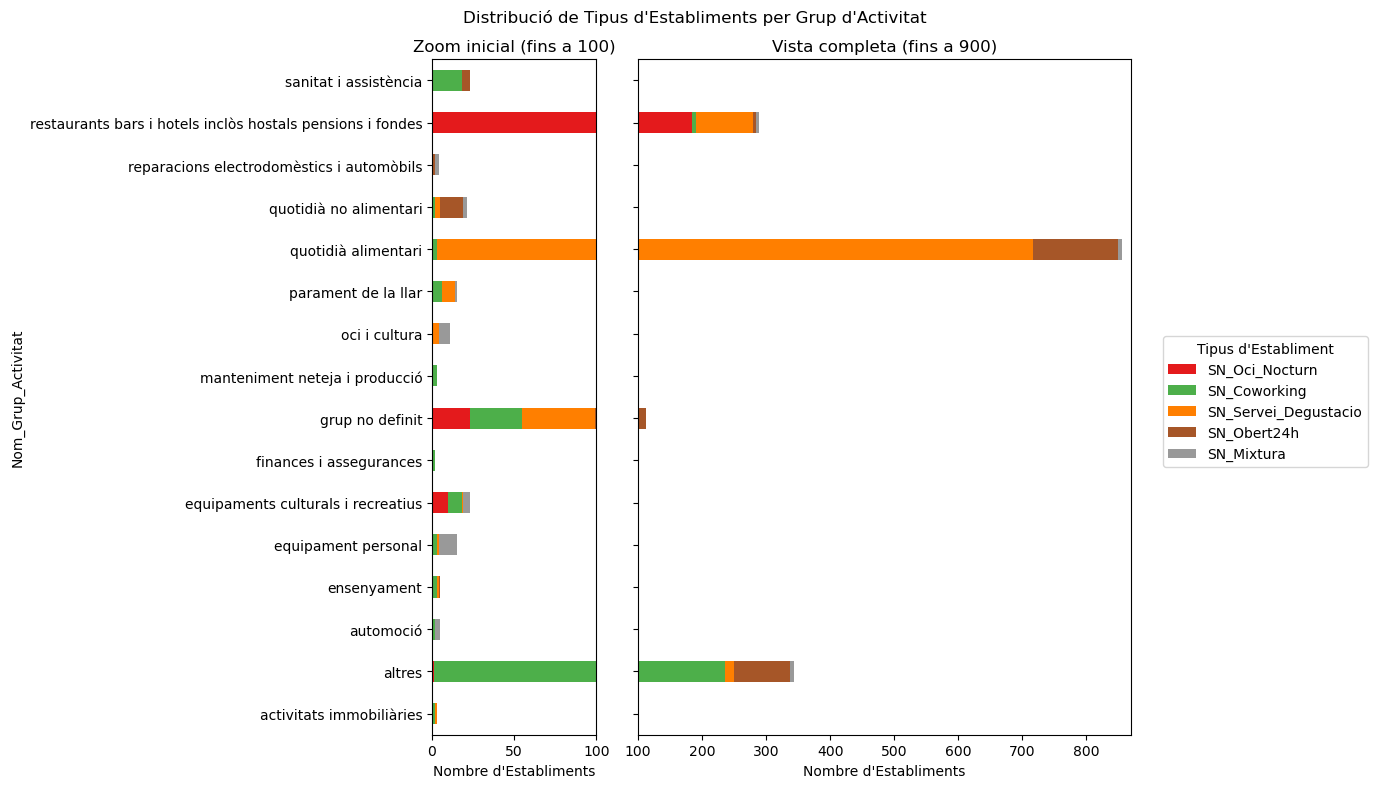

In [203]:
df_types = df_net[['SN_Oci_Nocturn', 'SN_Coworking', 'SN_Servei_Degustacio', 
                   'SN_Obert24h', 'SN_Mixtura']]
df_types_grouped = df_types.groupby(df_net['Nom_Grup_Activitat']).sum()

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14, 8), gridspec_kw={'width_ratios': [1, 3]})

# Primera subtrama: mostrar només fins a un rang menor (100)
df_types_grouped.plot(kind='barh', stacked=True, ax=ax1, colormap='Set1', legend=False)
ax1.set_xlim(0, 100)
ax1.set_title('Zoom inicial (fins a 100)')
ax1.set_xlabel('Nombre d\'Establiments')

# Segona subtrama: mostrar el rang complet fins a 900
df_types_grouped.plot(kind='barh', stacked=True, ax=ax2, colormap='Set1', legend=False)
ax2.set_xlim(100, 870)
ax2.set_title('Vista completa (fins a 900)')
ax2.set_xlabel('Nombre d\'Establiments')

# Ajustar marges i llegenda
fig.suptitle('Distribució de Tipus d\'Establiments per Grup d\'Activitat')
plt.legend(title='Tipus d\'Establiment', bbox_to_anchor=(1.05, 0.6), loc='upper left')
plt.tight_layout()
plt.show()


_Podem observar que dins dels tipus d'establiments, tenim gran quantitat de coworkings en la secció altres, dels quals alguns oberts 24h. També podem comprobar que dins de la secció d'alimentari, molts són amb servei només de degustació (segurament els que no tenien sortida de fums i no han obtingut la licència de restaurant i molts forns, que ja sabem que han estat en tendència en els últims anys).  Dins de la secció de bars i hotels, trobem molts amb permís d'oci nocturn, sobretot hotels i alguns bars i restaurants._


### 3.4 Comparativa per ubicació d'Establiments carrer, centre comercial, mercat, etc. ###

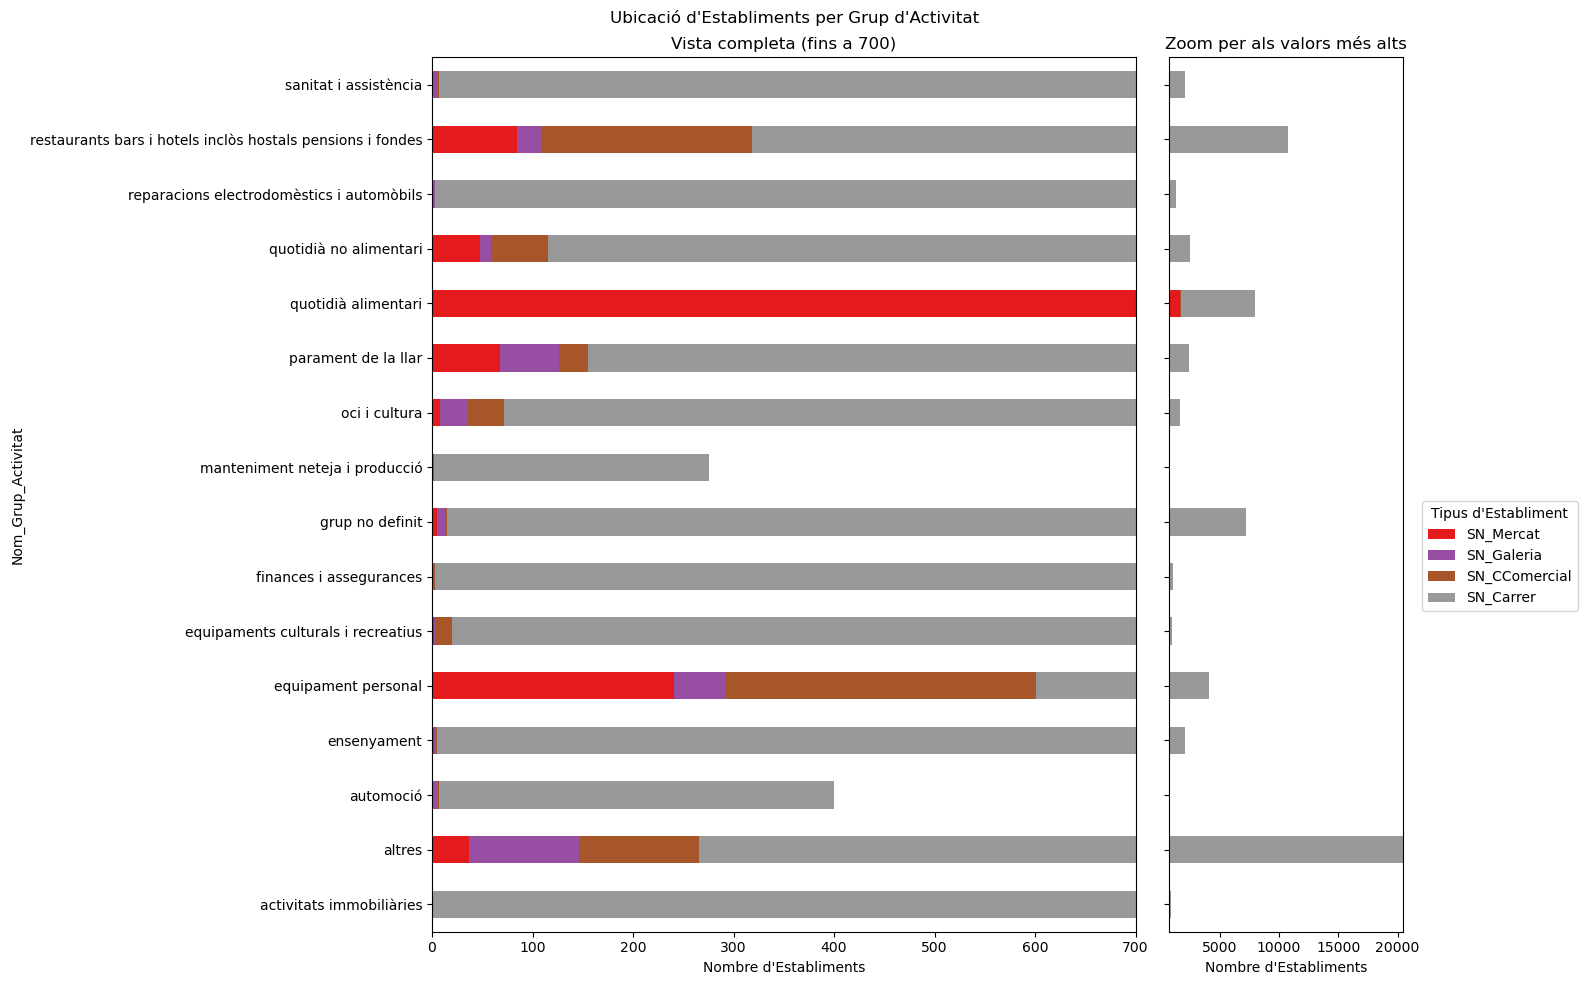

In [209]:
df_types = df_net[['SN_Mercat', 'SN_Galeria', 'SN_CComercial', 'SN_Carrer']]
# Agrupar per grup d'activitat
df_types_grouped = df_types.groupby(df_net['Nom_Grup_Activitat']).sum()

# Crear la figura i les subtrames amb diferents rangs
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 10), gridspec_kw={'width_ratios': [3, 1]})

# Primera subtrama: rang gran fins a 700 per als valors principals
df_types_grouped.plot(kind='barh', stacked=True, ax=ax1, colormap='Set1', legend=False)
ax1.set_xlim(0, 700)
ax1.set_title('Vista completa (fins a 700)')
ax1.set_xlabel('Nombre d\'Establiments')

# Segona subtrama: rang petit per veure els valors més alts
df_types_grouped.plot(kind='barh', stacked=True, ax=ax2, colormap='Set1', legend=False)
ax2.set_xlim(700, df_types_grouped.values.max() + 50)  # Ajustar el límit segons els valors màxims
ax2.set_title('Zoom per als valors més alts')
ax2.set_xlabel('Nombre d\'Establiments')

# Ajustos addicionals
fig.suptitle('Ubicació d\'Establiments per Grup d\'Activitat')
plt.legend(title='Tipus d\'Establiment', bbox_to_anchor=(1.05, 0.5), loc='upper left')
plt.tight_layout()

# Mostrar la gràfica
plt.show()


_Podem comprobar que la majoria de locals de l'estudi realitzat, es troven a peu de carrer. En el cas de quotidià alimentari, una petita part (amplificada a la gràfica) la trobem als mercats._

### 3.5 Índex d'Abastiment Comercial General per Districte i per Barri ###

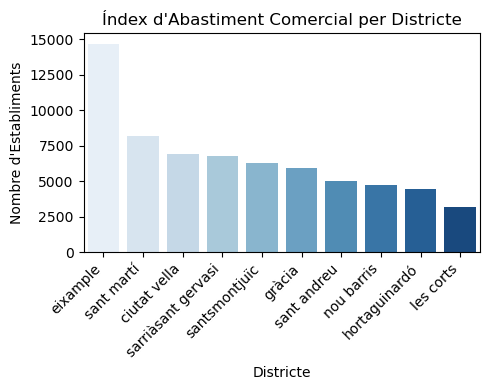

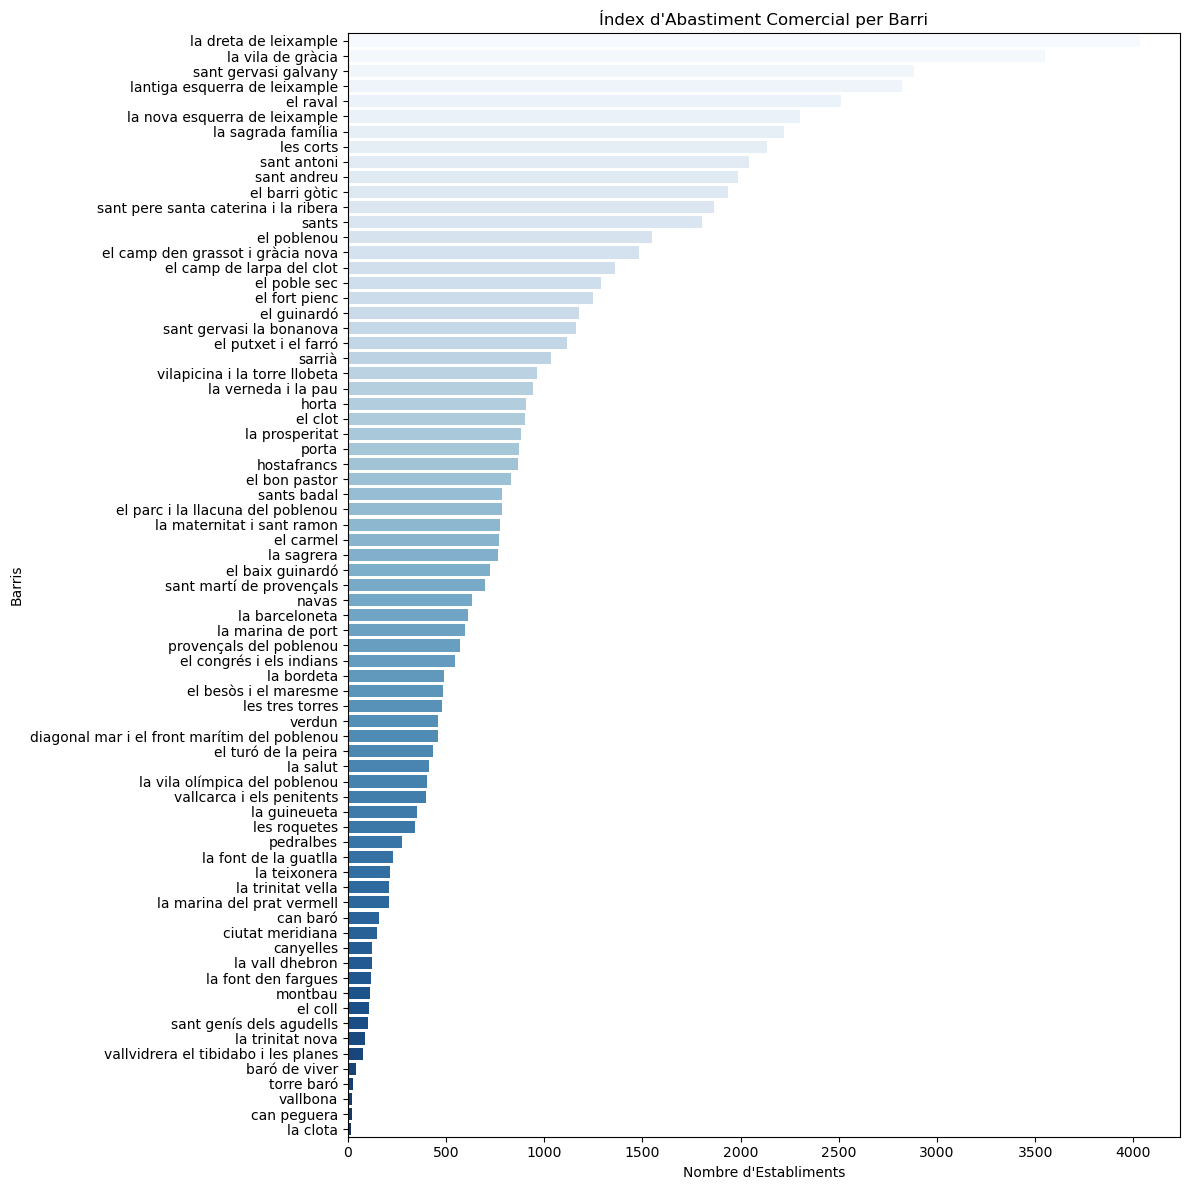

In [220]:
# Agrupar per districte i barri per obtenir el nombre d'establiments
districte_abastiment = df_net.groupby('Nom_Districte').size()
barri_abastiment = df_net.groupby('Nom_Barri').size()

# Ordenar els districtes per nombre d'establiments de més a menys
districte_abastiment_sorted_desc = districte_abastiment.sort_values(ascending=False)

# Mapa temàtic de densitat per districte
plt.figure(figsize=(5,4))
sns.barplot(x=districte_abastiment_sorted_desc.index, y=districte_abastiment_sorted_desc.values, palette='Blues')
plt.title('Índex d\'Abastiment Comercial per Districte')
plt.xlabel('Districte')
plt.ylabel('Nombre d\'Establiments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Ordenar els barris per nombre d'establiments de més a menys
barri_abastiment_sorted_desc = barri_abastiment.sort_values(ascending=False)

# Gràfic de barris
plt.figure(figsize=(12, 12))
sns.barplot(y=barri_abastiment_sorted_desc.index, x=barri_abastiment_sorted_desc.values, palette='Blues')
plt.title('Índex d\'Abastiment Comercial per Barri')
plt.xlabel('Nombre d\'Establiments')
plt.ylabel('Barris')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


_Així com en el primer gràfic podem contemplar, tot i les diferències per districtes, una distribució bastant equilibrada d'abastiment comercial, podem observar en el segon gràfic, com alguns barris, tenen índex molt baixos. Tot i que també hauriem de tenir en compte el tamany de cada barri i la densitat demogràfica._

### 3.7 Evolució Temporal de l'Estat d'Activitat ###

In [228]:
# fem copia perquè anem a fer canvis retllevans a les columnes per poder fer mètriques
df_opc1 = df_net.copy()

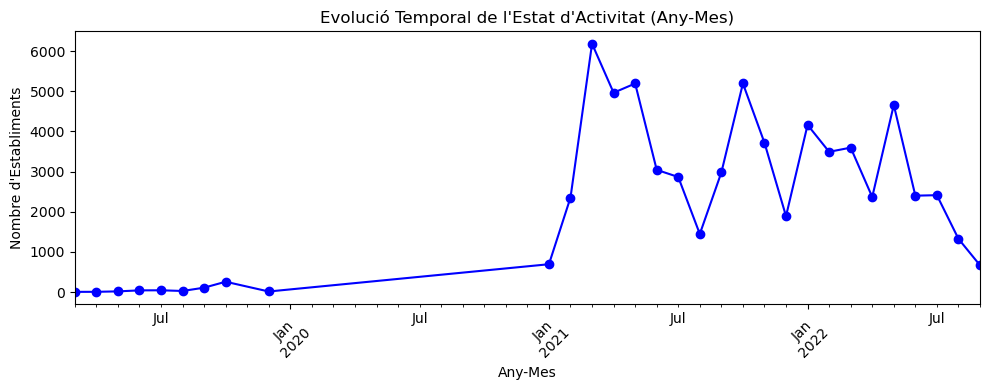

In [229]:
# Convertir 'Data_Revisio' a format datetime si no ho està ja
df_opc1['Data_Revisio'] = pd.to_datetime(df_opc1['Data_Revisio'], errors='coerce')

# Crear una nova columna 'Any_Mes' en format mensual
df_opc1['Any_Mes'] = df_opc1['Data_Revisio'].dt.to_period('M')

# Calcular el nombre d'establiments per cada mes i any
evolucio_mensual = df_opc1.groupby('Any_Mes').size()

# Graficar l'evolució temporal dels establiments per mes i any
plt.figure(figsize=(10, 4))
evolucio_mensual.plot(kind='line', marker='o', color='blue')
plt.title('Evolució Temporal de l\'Estat d\'Activitat (Any-Mes)')
plt.xlabel('Any-Mes')
plt.ylabel('Nombre d\'Establiments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

_Aquest gràfic mostra el canvi post-pandèmia, després de la inactivitat, mostrant un moment molt important amb l'inici d'activitat, però també mostra que cada cop, hi ha més tendència a finalitzar-la. Motiu pel qual és tant important aquest estudi._

In [222]:
df_0['Codi_Principal_Activitat'].unique()

array([1, 0], dtype=int64)

In [223]:
df_net['Nom_Principal_Activitat'].value_counts()


Nom_Principal_Activitat
actiu                        58908
sense activitat econòmica     7180
Name: count, dtype: int64

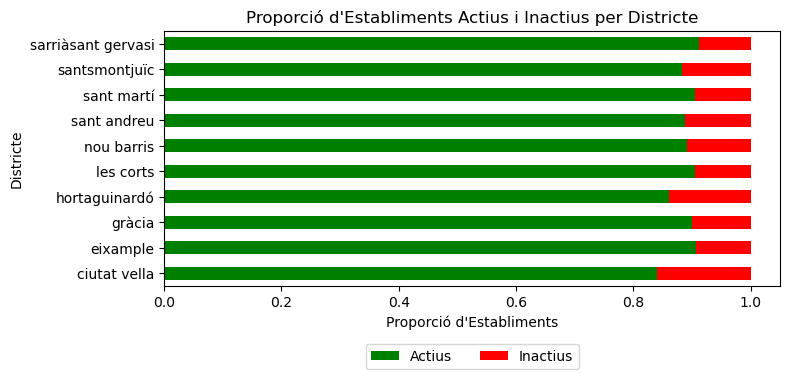

In [233]:
# Normalitzar els valors en minúscules per assegurar que són coherents
df_opc1['Nom_Principal_Activitat'] = df_opc1['Nom_Principal_Activitat'].str.lower()

# Crear la taula de contingència
df_proporcio = pd.crosstab(df_opc1['Nom_Districte'], df_opc1['Nom_Principal_Activitat'])

# Continuar amb el mateix codi per a la gràfica
if 'actiu' in df_proporcio.columns and 'sense activitat econòmica' in df_proporcio.columns:
    df_proporcio = df_proporcio.div(df_proporcio.sum(axis=1), axis=0)
    ax = df_proporcio[['actiu', 'sense activitat econòmica']].plot(
        kind='barh', stacked=True, figsize=(8, 4), color=['green', 'red']
    )

    plt.title('Proporció d\'Establiments Actius i Inactius per Districte')
    plt.xlabel('Proporció d\'Establiments')
    plt.ylabel('Districte')

    plt.legend(['Actius', 'Inactius'], loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)
    plt.tight_layout()
    plt.show()
else:
    print("Les categories 'actiu' o 'sense activitat econòmica' no es troben a les dades.")


_Les barres indiquen que tot i que hi ha molts locals en actiu, encara queda un 15% aprox inactius_

_Podem apreciar que el sector Serveis, sigui quin sigui el districte, predomina. Precedit per comerç al detall._

## 3.6 Estructura del comerç i els serveis per sector d'activitat i districte ##

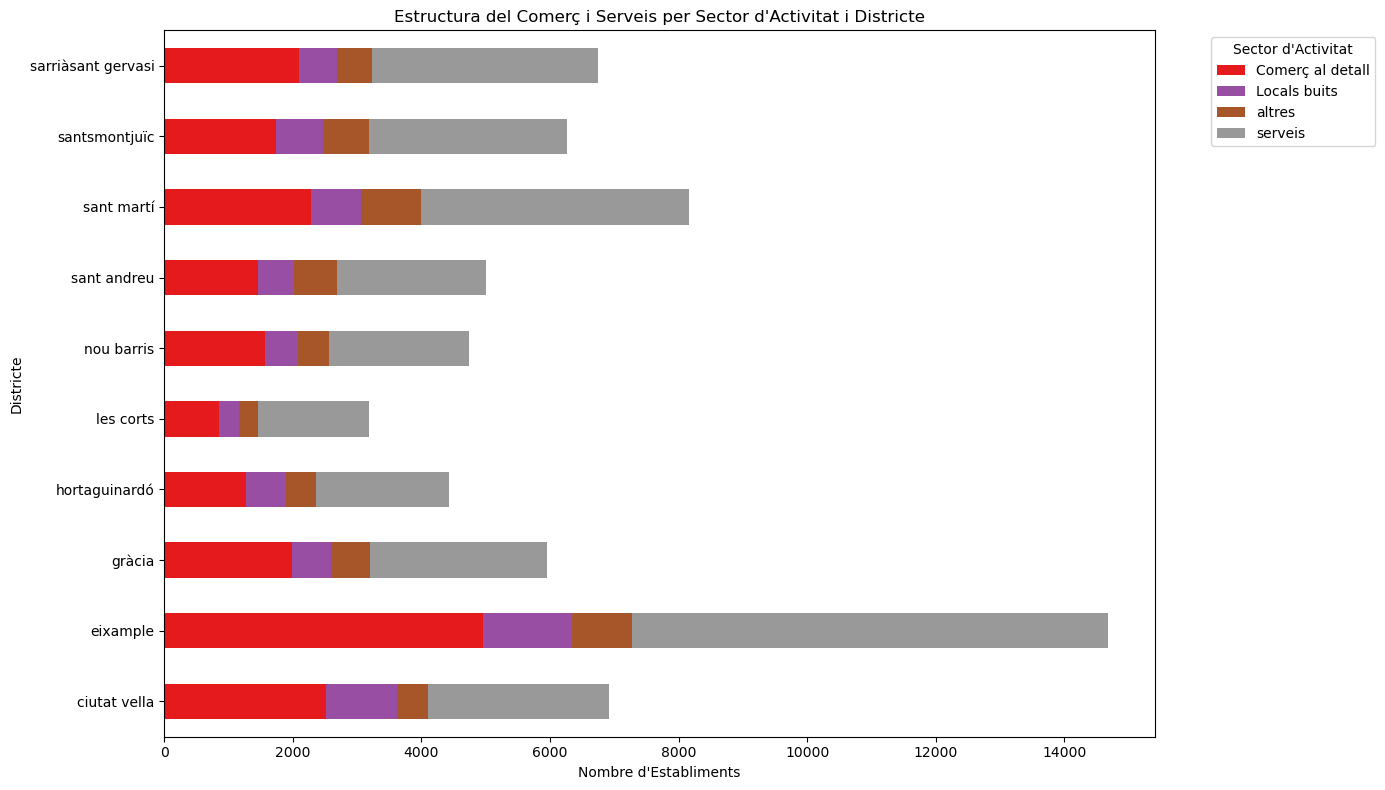

In [241]:
# Crear una taula de contingència per sector d'activitat i districte
df_comercio_serveis = pd.crosstab(df_opc1['Nom_Districte'], df_opc1['Nom_Sector_Activitat'])

# Crear la gràfica de barres apilades per sector d'activitat per districte
df_comercio_serveis.plot(kind='barh', stacked=True, figsize=(14, 8), colormap='Set1')

# Títol i etiquetes
plt.title('Estructura del Comerç i Serveis per Sector d\'Activitat i Districte')
plt.xlabel('Nombre d\'Establiments')
plt.ylabel('Districte')

# Ajustar la llegenda
plt.legend(title='Sector d\'Activitat', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el layout per evitar que es tallin les etiquetes
plt.tight_layout()

# Mostrar la gràfica
plt.show()


## 3.7 Evolució en el temps dels locals actius / inactius ##

_Observem que només hi ha 500 imputs del 2019, no n'hi ha del 2020 (covid) i veiem que la tendència és que pugen els locals sense activitat, quan pugen els que si en tenen.
Per entendre-ho millor, farem una altra gràfica solapant els mesos corresponents de cada any._

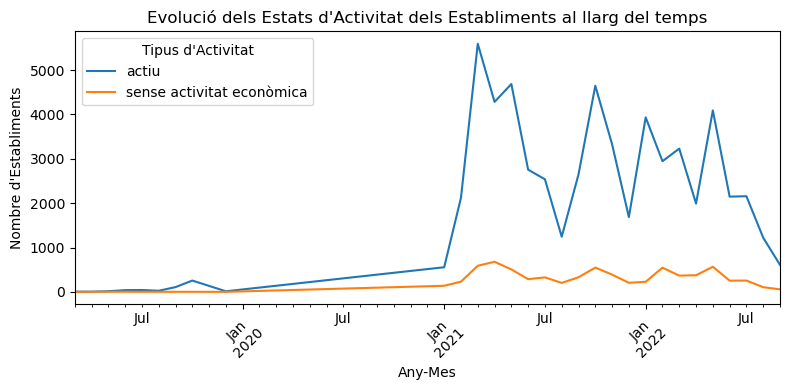

In [244]:
# Agrupar per any, mes i estat del local (actiu, inactiu, etc.)
df_net['Any_Mes'] = df_net['Data_Revisio'].dt.to_period('M')
evolucio_estat = df_net.groupby(['Any_Mes', 'Nom_Principal_Activitat']).size().unstack(fill_value=0)

# Visualitzar l'evolució temporal dels estats
evolucio_estat.plot(kind='line', figsize=(8, 4))
plt.title('Evolució dels Estats d\'Activitat dels Establiments al llarg del temps')
plt.xlabel('Any-Mes')
plt.ylabel('Nombre d\'Establiments')
plt.xticks(rotation=45)
plt.legend(title='Tipus d\'Activitat')
plt.tight_layout()
plt.show()


In [255]:
# Comprovar quantitat de dades per any
df_net['Any'] = df_net['Data_Revisio'].dt.year
df_net['Any'].value_counts()

Any
2021    40505
2022    25071
2019      512
Name: count, dtype: int64

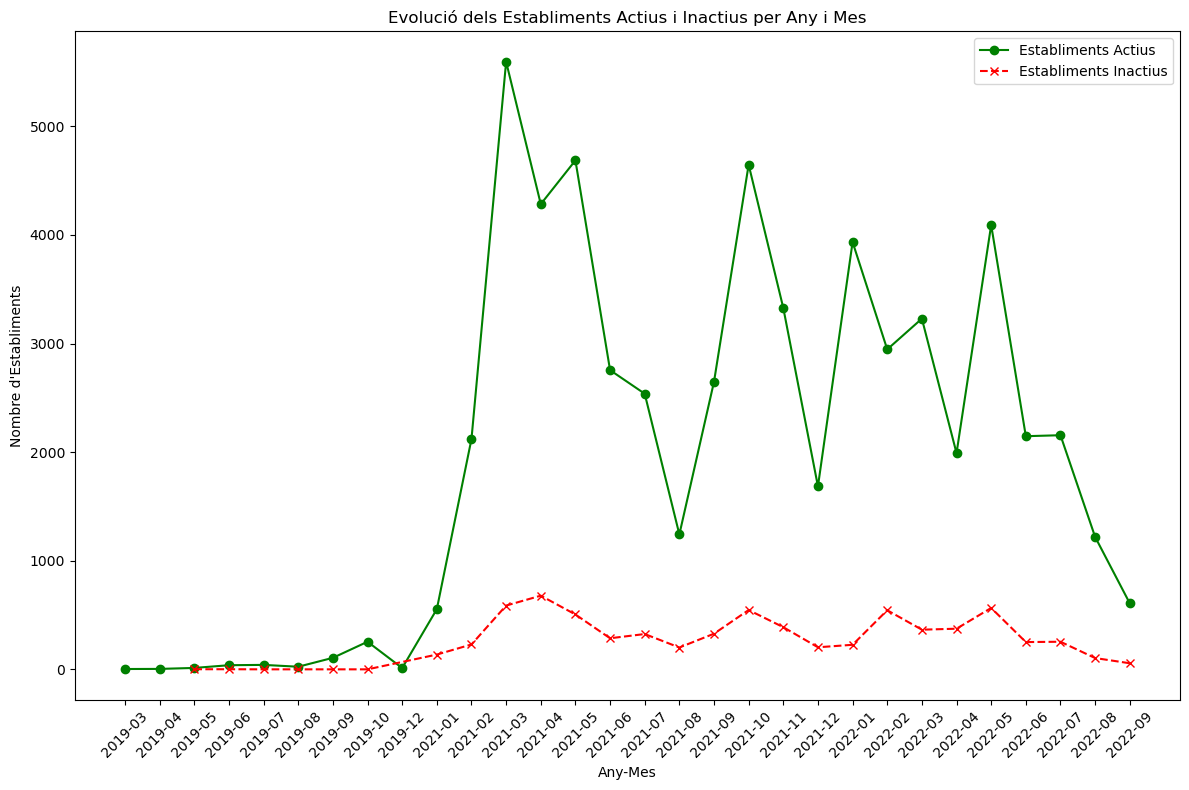

In [254]:
# Agrupar per any i mes i comptar els establiments actius i inactius per mes
df_opc1['Any_Mes'] = df_opc1['Any'].astype(str) + '-' + df_opc1['Mes'].astype(str).str.zfill(2)

# Filtrar establiments actius / inactius
df_actius = df_opc1[df_opc1['Nom_Principal_Activitat'] == 'actiu']
df_inactius = df_opc1[df_opc1['Nom_Principal_Activitat'] == 'sense activitat econòmica']

# Agrupar per Any_Mes i comptar els establiments
actius_per_mes = df_actius.groupby('Any_Mes').size()
inactius_per_mes = df_inactius.groupby('Any_Mes').size()

plt.figure(figsize=(12, 8))
# Dibuixar la línia per establiments actius
plt.plot(actius_per_mes.index, actius_per_mes.values, label='Establiments Actius', marker='o', color='green')
# Dibuixar la línia per establiments inactius
plt.plot(inactius_per_mes.index, inactius_per_mes.values, label='Establiments Inactius', marker='x', linestyle='--', color='red')

# Afegir títol i etiquetes
plt.title('Evolució dels Establiments Actius i Inactius per Any i Mes')
plt.xlabel('Any-Mes')
plt.ylabel('Nombre d\'Establiments')

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


_Podem comprobar en alguns mesos de l'any tendències semblants, i que pugen en proporció els locals amb activitat i els que no en tenen._

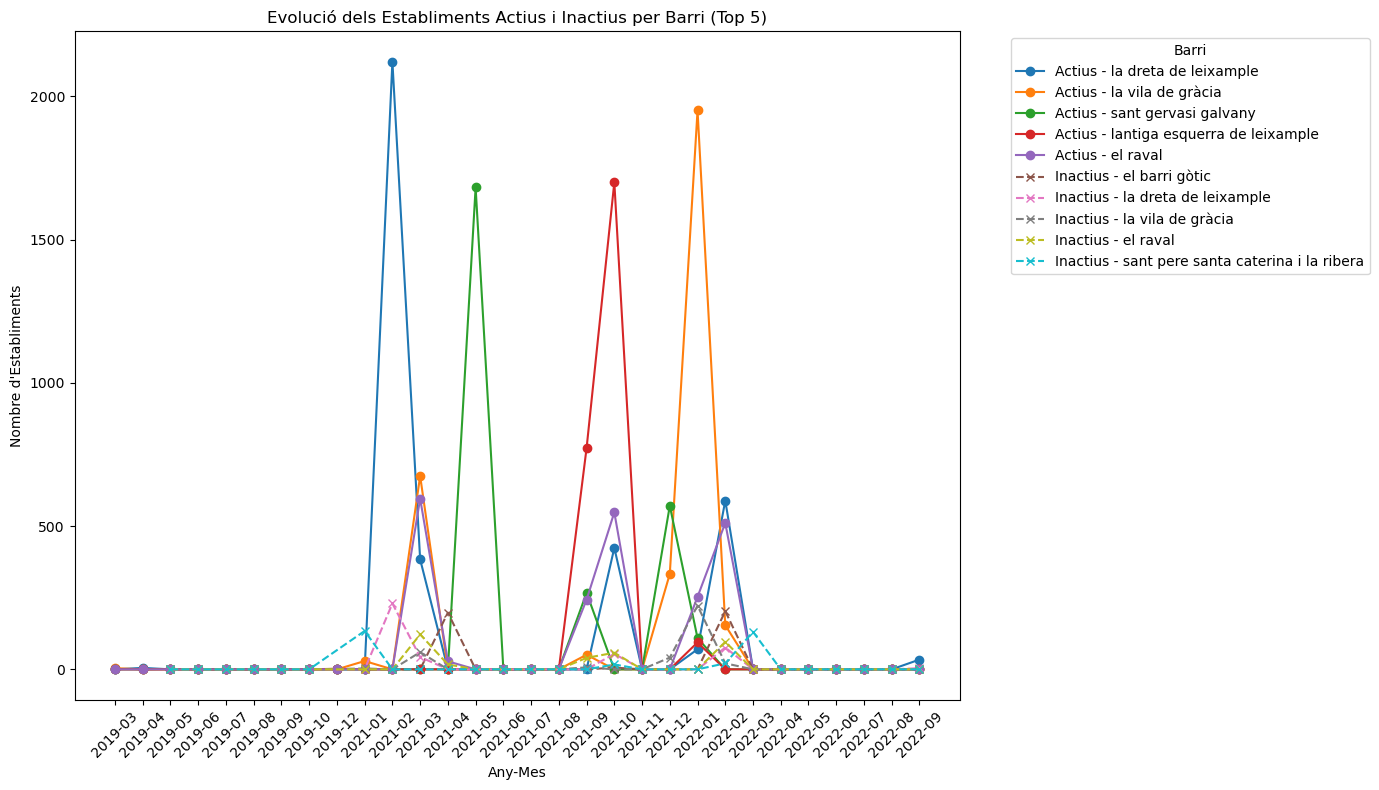

In [259]:
# Filtrar establiments actius / inactius
df_actius = df_opc1[df_opc1['Nom_Principal_Activitat'] == 'actiu']
df_inactius = df_opc1[df_opc1['Nom_Principal_Activitat'] == 'sense activitat econòmica']

# Agrupar per Any_Mes i Nom_Barri i comptar els establiments actius i inactius
actius_per_barri = df_actius.groupby(['Any_Mes', 'Nom_Barri']).size().unstack(fill_value=0)
inactius_per_barri = df_inactius.groupby(['Any_Mes', 'Nom_Barri']).size().unstack(fill_value=0)

# Seleccionar els 5 barris amb més establiments actius i inactius
top_5_actius = actius_per_barri.sum(axis=0).nlargest(5).index
top_5_inactius = inactius_per_barri.sum(axis=0).nlargest(5).index

# Filtrar només les dades dels 5 barris seleccionats
actius_per_barri_top5 = actius_per_barri[top_5_actius]
inactius_per_barri_top5 = inactius_per_barri[top_5_inactius]

# Crear la figura per a la gràfica
plt.figure(figsize=(14, 8))

# Dibuixar les línies per establiments actius (top 5 barris)
for barri in actius_per_barri_top5.columns:
    plt.plot(actius_per_barri_top5.index, actius_per_barri_top5[barri], label=f'Actius - {barri}', marker='o')

# Dibuixar les línies per establiments inactius (top 5 barris)
for barri in inactius_per_barri_top5.columns:
    plt.plot(inactius_per_barri_top5.index, inactius_per_barri_top5[barri], label=f'Inactius - {barri}', marker='x', linestyle='--')

# Afegir títol i etiquetes
plt.title('Evolució dels Establiments Actius i Inactius per Barri (Top 5)')
plt.xlabel('Any-Mes')
plt.ylabel('Nombre d\'Establiments')

# Rotar les dates per una millor visualització
plt.xticks(rotation=45)

# Afegir llegenda
plt.legend(title='Barri', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar la disposició per evitar sobreposicions
plt.tight_layout()

# Mostrar la gràfica
plt.show()


_Contemplem els pics que de les mostres obtingudes, destacant el 2021, moment postpandemia i amb un descens en el 2022. Destaca el barri de l'Eixample que obté un descens al 2022, a diferència del barri de gràcia que el 2021 estava per sota (mensy establiments actius) que el 2022._

UN COP REALITZAT L'ESTUDI EDA I TENINT UNA VISIÓ GENERAL, CAL DIR QUE NO COMPTEM AMB DADES PER PODER REALITZAR UNA PREDICCIÓ DE CLASSIFICACIÓ PER LOCALS ACTIU O SENSE ACTIVITAT. DONCS DELS LOCALS INACTIUS, NO ES VAN REGISTRAR DADES COM DEMOSTRO EN EL GRÀFIC ANTERIOR.

In [281]:
# Filtrar locals inactius
locals_inactius = df_net[df_net['Nom_Principal_Activitat'] == 'Inactiu']

# Resum de les característiques dels locals inactius
locals_inactius.describe()


,Codi_Principal_Activitat,Codi_Sector_Activitat,Codi_Grup_Activitat,Codi_Activitat_2022,SN_Oci_Nocturn,SN_Coworking,SN_Servei_Degustacio,SN_Obert24h,SN_Mixtura,SN_Carrer,...,Y_UTM_ETRS89,Latitud,Longitud,Codi_Via,Num_Policia_Inicial,Num_Policia_Final,Seccio_Censal,Codi_Barri,Codi_Districte,Data_Revisio
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [282]:
df_net.to_csv('df_net.csv', index=False)  # index=False per no incloure l'índex com a columna